# NAO Greenhouse Gas Research




In [318]:
#This is the cell that we would import all the libraries we will be using.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 



### DATA CLEANING/PREPARATION

In [196]:

ghgases= pd.read_csv("ghgedited.csv",index_col="Section")
ghgases.head()

#After removing the addittional sheets from the excel file and changing to a csv instead of xls there is still much to do


,SIC(07) group,Sectors,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Section,,,,,,,,,,,,,,,,,,,,,
A,1,"Products of agriculture, hunting and related s...","54,235.4","53,964.7","53,493.7","52,625.7","53,801.6","53,594.4","54,556.6","53,701.3",...,"46,014.9","45,703.9","45,505.5","47,235.2","47,211.2","47,379.0","47,996.2","47,508.7","47,757.0","46,081.3"
A,2,"Products of forestry, logging and related serv...",46.8,47.0,47.8,53.8,61.0,52.5,49.5,55.5,...,45.5,51.6,53.9,64.6,73.3,88.2,88.3,88.3,93.2,90.0
A,3,Fish and other fishing products; aquaculture p...,949.6,972.6,"1,002.4","1,058.4","1,078.2","1,123.9","1,090.0","1,068.7",...,728.5,766.0,759.5,910.0,859.9,844.8,863.0,819.9,724.4,672.0
B,5,Mining of coal and lignite,"23,138.0","23,672.5","23,449.2","21,713.9","14,669.9","15,890.2","14,716.7","14,123.4",...,"2,826.9","2,808.4","1,985.2","1,975.3","1,672.4",800.0,784.0,750.6,688.1,643.1
B,6,Crude petroleum and natural gas,"22,761.8","22,323.2","23,264.4","25,014.2","26,688.2","27,170.8","28,600.9","28,451.9",...,"19,753.0","18,158.5","17,806.1","17,430.4","19,176.5","18,751.7","18,758.2","18,733.5","18,804.6","17,157.8"


Our problem statement indicates investigation of greenhouse gases over time, therefore we will be dropping the columns as they are not necessary


In [197]:
#Lets get a more in depth look at the columns so we can choose an accuarate distribution for our naivebayes model
ghgases= ghgases.drop(['SIC(07) group','Sectors'], axis=1)


We need to transpose the database for easier exploration and edit the column names to fit best practice

In [198]:
ghgases.columns = ghgases.columns.str.replace(' ', '')
ghgases=ghgases.T
ghgases.head()


Section,A,A,A,B,B,B,B,B,C,C,...,R,R,S,S,S,T,U,V,NaN,TOTAL
1990,"54,235.4",46.8,949.6,"23,138.0","22,761.8",25.0,"1,988.9",780.1,978.0,748.9,...,247.6,976.7,465.2,91.9,563.9,45.3,"81,863.7","60,427.1",NaN,"833,354.6"
1991,"53,964.7",47.0,972.6,"23,672.5","22,323.2",23.7,"1,945.9",741.8,"1,085.3",717.3,...,265.6,"1,057.6",512.2,93.0,614.8,45.6,"90,751.8","60,049.6",NaN,"842,950.1"
1992,"53,493.7",47.8,"1,002.4","23,449.2","23,264.4",23.7,"1,915.8",678.3,"1,123.7",724.6,...,240.4,972.1,478.2,90.9,591.6,46.6,"88,135.4","61,025.0",NaN,"823,413.4"
1993,"52,625.7",53.8,"1,058.4","21,713.9","25,014.2",24.0,"1,760.6",629.8,"1,140.7",660.8,...,249.9,"1,020.1",509.5,93.0,614.9,47.7,"92,451.5","61,468.5",NaN,"805,464.7"
1994,"53,801.6",61.0,"1,078.2","14,669.9","26,688.2",25.1,"1,713.2",692.3,"1,223.0",632.5,...,238.1,"1,001.3",493.7,96.6,627.9,50.2,"88,252.7","60,640.4",NaN,"795,850.0"


We need to check the data type of these values before we can work on them and remove characters that would hinder our attempts to change the data types

In [199]:
ghgases.dtypes

Section
A        object
A        object
A        object
B        object
B        object
          ...  
T        object
U        object
V        object
NaN      object
TOTAL    object
Length: 133, dtype: object

In [200]:
ghgases= ghgases.replace({',': ''}, regex=True)
ghgases= ghgases.astype(float)
ghgases.dtypes
ghgases=ghgases.dropna(axis=1)

We now have a cleaned and proper table we can work with to explore and predict data

In [201]:
display(ghgases)

Section,A,A,A,B,B,B,B,B,C,C,...,R,R,R,S,S,S,T,U,V,TOTAL
1990,54235.4,46.8,949.6,23138.0,22761.8,25.0,1988.9,780.1,978.0,748.9,...,166.4,247.6,976.7,465.2,91.9,563.9,45.3,81863.7,60427.1,833354.6
1991,53964.7,47.0,972.6,23672.5,22323.2,23.7,1945.9,741.8,1085.3,717.3,...,172.4,265.6,1057.6,512.2,93.0,614.8,45.6,90751.8,60049.6,842950.1
1992,53493.7,47.8,1002.4,23449.2,23264.4,23.7,1915.8,678.3,1123.7,724.6,...,151.1,240.4,972.1,478.2,90.9,591.6,46.6,88135.4,61025.0,823413.4
1993,52625.7,53.8,1058.4,21713.9,25014.2,24.0,1760.6,629.8,1140.7,660.8,...,155.6,249.9,1020.1,509.5,93.0,614.9,47.7,92451.5,61468.5,805464.7
1994,53801.6,61.0,1078.2,14669.9,26688.2,25.1,1713.2,692.3,1223.0,632.5,...,144.4,238.1,1001.3,493.7,96.6,627.9,50.2,88252.7,60640.4,795850.0
1995,53594.4,52.5,1123.9,15890.2,27170.8,25.6,1639.2,785.8,1355.8,674.2,...,137.6,232.2,1003.2,501.5,97.8,644.6,51.8,83805.7,59791.2,791630.7
1996,54556.6,49.5,1090.0,14716.7,28600.9,16.9,1642.1,832.3,1334.6,685.0,...,137.2,235.0,1048.0,527.5,98.6,669.7,50.5,95430.3,63343.9,818061.3
1997,53701.3,55.5,1068.7,14123.4,28451.9,15.5,1556.6,823.3,1316.1,677.8,...,121.7,211.9,957.0,465.6,96.9,628.9,51.0,88500.9,64323.2,802321.4
1998,53646.4,53.7,1108.8,12034.4,29398.0,14.8,1488.1,851.1,1322.5,696.5,...,115.5,215.1,991.3,485.3,96.3,658.7,49.0,90811.0,64152.2,807210.1
1999,53641.9,54.3,1006.9,10067.5,28367.0,14.4,1402.6,288.8,1048.7,572.9,...,104.2,210.6,1000.7,478.7,97.6,687.3,50.5,90920.0,65228.5,775311.6


### EXPLORATORY DATA ANALYSIS

<AxesSubplot:>

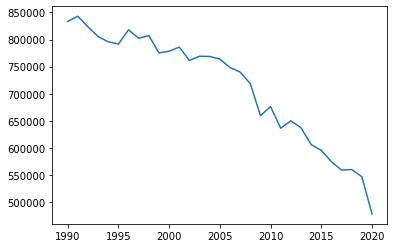

In [203]:
ghgases.TOTAL.plot()

TOTAL GREENHOUSE EMISSIONS PLOTED AGAINST LAST 5 YEARS

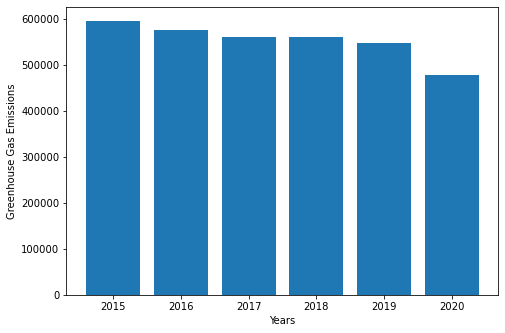

In [514]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Years = ['2015','2016', '2017', '2018', '2019', '2020']
total = ghgases.iloc[25:31,-1]
ax.bar(Years,total)
ax.set_xlabel('Years')
ax.set_ylabel('Greenhouse Gas Emissions')
plt.show()

The bar graph shows a downward trend in the ghgas emissions with a sharpdrop between 2019 and 2020, we will be expecting our model to follow this trend

## Scaling, Sampling, and Principal Component Analysis

This data set has 100+ dimensions. Is it possible to make total green house emissions our target variable. Using Principle Component analysis for dimensional reductionality is possible if we compile each sectors multiple dimensions into one dimension

In [472]:

X = ghgases.iloc[:,:-1]
y = ghgases.iloc[:,-1].values



We will use pca to compile the dimensions in each sector so aas to reduce dimensionality and still mantain as much data as possible

In [478]:
scalar=StandardScaler()

X_sector1= pd.DataFrame(scalar.fit_transform(X.A))
X_sector1.columns= X.A.columns
pca = PCA(n_components = 1)
pca.fit(X_sector1)
X_sector1 = pca.transform(X_sector1)
X_sector1 = pd.DataFrame(X_sector1,columns=['A'])
X_sector1= X_sector1.values.tolist()

X_sector2= pd.DataFrame(scalar.fit_transform(X.B))
X_sector2.columns= X.B.columns
pca = PCA(n_components = 1)
pca.fit(X_sector2)
X_sector2 = pca.transform(X_sector2)
X_sector2 = pd.DataFrame(X_sector2,columns=['B'])
X_sector2= X_sector2.values.tolist()

X_sector3= pd.DataFrame(scalar.fit_transform(X.C))
X_sector3.columns= X.C.columns
pca = PCA(n_components = 1)
pca.fit(X_sector3)
X_sector3 = pca.transform(X_sector3)
X_sector3 = pd.DataFrame(X_sector3,columns=['C'])
X_sector3= X_sector3.values.tolist()

X_sector4= pd.DataFrame(scalar.fit_transform(X.D))
X_sector4.columns= X.D.columns
pca = PCA(n_components = 1)
pca.fit(X_sector4)
X_sector4 = pca.transform(X_sector4)
X_sector4 = pd.DataFrame(X_sector4,columns=['D'])
X_sector4= X_sector4.values.tolist()

X_sector5= pd.DataFrame(scalar.fit_transform(X.E))
X_sector5.columns= X.E.columns
pca = PCA(n_components = 1)
pca.fit(X_sector5)
X_sector5 = pca.transform(X_sector5)
X_sector5 = pd.DataFrame(X_sector5,columns=['E'])
X_sector5= X_sector5.values.tolist()

X_sector6= pd.DataFrame(scalar.fit_transform(X.F))
X_sector6.columns= X.F.columns
pca = PCA(n_components = 1)
pca.fit(X_sector6)
X_sector6 = pca.transform(X_sector6)
X_sector6 = pd.DataFrame(X_sector6,columns=['F'])
X_sector6= X_sector6.values.tolist()

X_sector7= pd.DataFrame(scalar.fit_transform(X.G))
X_sector7.columns= X.G.columns
pca = PCA(n_components = 1)
pca.fit(X_sector7)
X_sector7 = pca.transform(X_sector7)
X_sector7 = pd.DataFrame(X_sector7,columns=['G'])
X_sector7= X_sector7.values.tolist()

X_sector8= pd.DataFrame(scalar.fit_transform(X.H))
X_sector8.columns= X.H.columns
pca = PCA(n_components = 1)
pca.fit(X_sector8)
X_sector8 = pca.transform(X_sector8)
X_sector8 = pd.DataFrame(X_sector8,columns=['H'])
X_sector8= X_sector8.values.tolist()


X_sector9= pd.DataFrame(scalar.fit_transform(X.I))
X_sector9.columns= X.I.columns
pca = PCA(n_components = 1)
pca.fit(X_sector9)
X_sector9 = pca.transform(X_sector9)
X_sector9 = pd.DataFrame(X_sector9,columns=['I'])
X_sector9= X_sector9.values.tolist()

X_sector10= pd.DataFrame(scalar.fit_transform(X.J))
X_sector10.columns= X.J.columns
pca = PCA(n_components = 1)
pca.fit(X_sector10)
X_sector10= pca.transform(X_sector10)
X_sector10= pd.DataFrame(X_sector10,columns=['J'])
X_sector10= X_sector10.values.tolist()

X_sector11= pd.DataFrame(scalar.fit_transform(X.K))
X_sector11.columns= X.K.columns
pca = PCA(n_components = 1)
pca.fit(X_sector11)
X_sector11= pca.transform(X_sector11)
X_sector11 = pd.DataFrame(X_sector11,columns=['K'])
X_sector11= X_sector11.values.tolist()

X_sector12= pd.DataFrame(scalar.fit_transform(X.L))
X_sector12.columns= X.L.columns
pca = PCA(n_components = 1)
pca.fit(X_sector12)
X_sector12= pca.transform(X_sector12)
X_sector12 = pd.DataFrame(X_sector12,columns=['L'])
X_sector12= X_sector12.values.tolist()

X_sector13= pd.DataFrame(scalar.fit_transform(X.M))
X_sector13.columns= X.M.columns
pca = PCA(n_components = 1)
pca.fit(X_sector13)
X_sector13= pca.transform(X_sector13)
X_sector13 = pd.DataFrame(X_sector13,columns=['M'])
X_sector13= X_sector13.values.tolist()


X_sector14= pd.DataFrame(scalar.fit_transform(X.N))
X_sector14.columns= X.N.columns
pca = PCA(n_components = 1)
pca.fit(X_sector14)
X_sector14= pca.transform(X_sector14)
X_sector14 = pd.DataFrame(X_sector14,columns=['N'])
X_sector14= X_sector14.values.tolist()

X_sector15= pd.DataFrame(scalar.fit_transform(X.O))
X_sector15.columns= X.O.columns
pca = PCA(n_components = 1)
pca.fit(X_sector15)
X_sector15= pca.transform(X_sector15)
X_sector15 = pd.DataFrame(X_sector15,columns=['O'])
X_sector15= X_sector15.values.tolist()

X_sector16= pd.DataFrame(scalar.fit_transform(X.Q))
X_sector16.columns= X.Q.columns
pca = PCA(n_components = 1)
pca.fit(X_sector16)
X_sector16= pca.transform(X_sector16)
X_sector16 = pd.DataFrame(X_sector16,columns=['Q'])
X_sector16= X_sector16.values.tolist()

X_sector17= pd.DataFrame(scalar.fit_transform(X.R))
X_sector17.columns= X.R.columns
pca = PCA(n_components = 1)
pca.fit(X_sector17)
X_sector17= pca.transform(X_sector17)
X_sector17 = pd.DataFrame(X_sector17,columns=['R'])
X_sector17= X_sector17.values.tolist()

X_sector18= pd.DataFrame(scalar.fit_transform(X.S))
X_sector18.columns= X.S.columns
pca = PCA(n_components = 1)
pca.fit(X_sector18)
X_sector18= pca.transform(X_sector18)
X_sector18 = pd.DataFrame(X_sector18,columns=['S'])
X_sector18= X_sector18.values.tolist()






In [479]:
X= ghgases.drop(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','Q','R','S','T','U','V','P', 'TOTAL'], axis=1)
X['A']= X_sector1
X['B']= X_sector2
X['C']= X_sector3
X['D']= X_sector4
X['E']= X_sector5
X['F']= X_sector6
X['G']= X_sector7
X['H']= X_sector8
X['I']= X_sector9
X['J']= X_sector10
X['K']= X_sector11
X['L']= X_sector12
X['M']= X_sector13
X['N']= X_sector14
X['O']= X_sector15
X['Q']= X_sector16
X['R']= X_sector17
X['S']= X_sector18




X['A'] = X['A'].str.get(0)
X['B'] = X['B'].str.get(0)
X['C'] = X['C'].str.get(0)
X['D'] = X['D'].str.get(0)
X['E'] = X['E'].str.get(0)
X['F'] = X['F'].str.get(0)
X['G'] = X['G'].str.get(0)
X['H'] = X['H'].str.get(0)
X['I'] = X['I'].str.get(0)
X['J'] = X['J'].str.get(0)
X['K'] = X['K'].str.get(0)
X['L'] = X['L'].str.get(0)
X['M'] = X['M'].str.get(0)
X['N'] = X['N'].str.get(0)
X['O'] = X['O'].str.get(0)
X['Q'] = X['Q'].str.get(0)
X['R'] = X['R'].str.get(0)
X['S'] = X['S'].str.get(0)








X

Section,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Q,R,S
1990,-1.628971,3.252285,8.308267,4.632462,2.571652,2.538070,1.969686,-2.927751,-2.069839,-0.199052,2.566453,2.899316,-0.514272,2.873743,-1.926980,-0.736396,2.543572,-0.491149
1991,-1.680380,3.048298,9.488882,4.087031,2.468216,2.595972,1.976483,-2.742105,0.108006,-1.104957,0.666027,1.966709,-2.091308,2.245960,-1.519785,-1.372919,3.215981,-1.330086
1992,-1.709429,2.991135,8.446672,3.979684,2.740157,2.478902,1.960165,-2.720161,-1.244987,-0.731576,1.370035,2.326893,-1.421209,2.485100,-1.608345,-2.108504,2.178311,-0.784895
1993,-1.668861,2.810317,6.988713,3.290034,2.645171,2.292997,1.891182,-2.669964,-0.223472,-1.315249,0.566476,1.816741,-1.648850,2.187124,-1.742066,-1.368136,2.678042,-1.313077
1994,-1.859464,2.628253,6.189571,2.605768,2.605366,1.680072,1.705016,-2.928956,-0.296571,-1.622887,-0.097288,1.486703,-2.237971,2.124668,-1.337247,-1.432295,2.423659,-1.507185
1995,-2.227709,2.847622,5.337686,2.609091,2.367307,1.517900,1.624816,-2.843933,0.225355,-2.001939,-1.276326,1.075632,-2.979601,1.957472,-1.410693,-1.153156,2.295437,-1.773411
1996,-2.331612,2.417544,5.765515,2.174133,2.019159,1.146141,1.452686,-2.943329,1.156831,-2.258169,-2.377583,0.794945,-3.121560,1.641104,-1.331537,-2.266992,2.594615,-2.218634
1997,-1.911989,2.157556,4.745357,0.467044,2.639571,0.840672,1.373361,-3.236357,-0.772164,-1.501860,-1.504263,1.451375,-1.798365,1.985213,-1.077164,-1.654658,1.586998,-1.344663
1998,-2.137866,2.030872,3.319111,0.564418,1.750584,0.499606,1.142494,-2.987389,0.399522,-1.909881,-1.534598,0.913101,-2.385189,1.557108,-0.856316,-1.605161,1.795345,-1.722228
1999,-1.620462,0.792641,3.331542,-0.010999,1.571884,0.169077,0.967667,-2.555041,1.280719,-2.480565,-2.112112,0.139625,-3.421263,1.130148,-0.966828,-0.669478,1.515193,-2.008143


We have reduced our columns from over 100 to just 22 using PCA. we will now scale these values relative to each other rather than inter sector scaling

In [565]:
X_scale= pd.DataFrame(scalar.fit_transform(X))
X_scale.columns=X.columns


In [477]:
X_scaled.index= Y.index

X

Section,A,A,A,B,B,B,B,B,C,C,...,R,R,R,R,S,S,S,T,U,V
1990,54235.4,46.8,949.6,23138.0,22761.8,25.0,1988.9,780.1,978.0,748.9,...,250.6,166.4,247.6,976.7,465.2,91.9,563.9,45.3,81863.7,60427.1
1991,53964.7,47.0,972.6,23672.5,22323.2,23.7,1945.9,741.8,1085.3,717.3,...,264.7,172.4,265.6,1057.6,512.2,93.0,614.8,45.6,90751.8,60049.6
1992,53493.7,47.8,1002.4,23449.2,23264.4,23.7,1915.8,678.3,1123.7,724.6,...,235.5,151.1,240.4,972.1,478.2,90.9,591.6,46.6,88135.4,61025.0
1993,52625.7,53.8,1058.4,21713.9,25014.2,24.0,1760.6,629.8,1140.7,660.8,...,256.5,155.6,249.9,1020.1,509.5,93.0,614.9,47.7,92451.5,61468.5
1994,53801.6,61.0,1078.2,14669.9,26688.2,25.1,1713.2,692.3,1223.0,632.5,...,262.1,144.4,238.1,1001.3,493.7,96.6,627.9,50.2,88252.7,60640.4
1995,53594.4,52.5,1123.9,15890.2,27170.8,25.6,1639.2,785.8,1355.8,674.2,...,260.1,137.6,232.2,1003.2,501.5,97.8,644.6,51.8,83805.7,59791.2
1996,54556.6,49.5,1090.0,14716.7,28600.9,16.9,1642.1,832.3,1334.6,685.0,...,270.8,137.2,235.0,1048.0,527.5,98.6,669.7,50.5,95430.3,63343.9
1997,53701.3,55.5,1068.7,14123.4,28451.9,15.5,1556.6,823.3,1316.1,677.8,...,238.2,121.7,211.9,957.0,465.6,96.9,628.9,51.0,88500.9,64323.2
1998,53646.4,53.7,1108.8,12034.4,29398.0,14.8,1488.1,851.1,1322.5,696.5,...,251.2,115.5,215.1,991.3,485.3,96.3,658.7,49.0,90811.0,64152.2
1999,53641.9,54.3,1006.9,10067.5,28367.0,14.4,1402.6,288.8,1048.7,572.9,...,230.7,104.2,210.6,1000.7,478.7,97.6,687.3,50.5,90920.0,65228.5


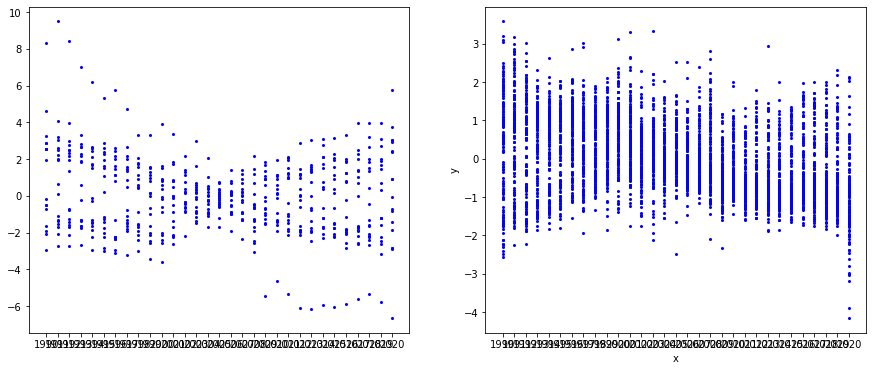

In [414]:
fig, ax  = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(Y.index,X.values, '.b', markersize = 4)
ax[1].plot(Y.index,X_scaled.values, '.b', markersize = 4)

ax[1].set_xlabel('x')
ax[1].set_ylabel('y')

plt.show()

These first Graph shows me plotting the sections scaled internally only and the second graph shows the plot of general scaling. The first graph is more rational for a linear regression. I willl now split the data into testing and training sets for easier graphical representation

# Modelling

In [457]:
X_train,X_test,Y_train,Y_test = train_test_split(X.values,Y.values)




In [461]:
regressors = LinearRegression() 

model=regressors.fit(X_train, Y_train) 

In [463]:
model.coef_

array([   299.91098134, -25076.13572751, -16198.33912453,  10500.07037349,
        -6775.21611366, -18978.74384291,  31806.43781224,  43440.37515856,
       -14640.48163214,  71786.37586808, -33849.06286275,  28839.53261493,
       -71967.11971168,  77321.04499909, -31252.8319039 ,  -4626.00791155,
        38682.64010299,  28365.44282552])

In [464]:
model.intercept_


715954.2511228673

In [465]:
model.score(X_train, Y_train)


0.9902725906857217

In [466]:
y_pred = regressors.predict(X_test)

Y_pred

array([571710.36582725, 612643.10537107, 794702.62186391, 537295.93041085,
       676299.84683546, 580475.23196041, 826861.03718661, 849015.64535333])

In [467]:
Y_test



array([595689.2, 676190.7, 775311.6, 574539. , 650028.2, 478309.5,
       823413.4, 791630.7])

The UK aims to cut down greenhouse gas emissions by 7.5% every year. But according to the new scientist, the Ghgas emissions rose about 4.7% between 2020 and 2021, 1% between 2021 and 2022. we will generate new data for that. Currently we will pass new data into it to predict the value of 2021,2022,2023,2024,2025

In [562]:

x_new= pd.DataFrame(X.loc['2020'].add(X.loc['2020']*0.047))
x_new['2021']= x_new['2020'].add(x_new['2020']*0.015)
x_new['2022']= x_new['2021'].add(x_new['2021']*0.075)
x_new['2023']= x_new['2022'].add(x_new['2022']*0.075)
x_new['2024']= x_new['2023'].add(x_new['2023']*0.075)






x_new= x_new.T

x_new

Section,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Q,R,S
2020,2.546291,-2.962465,-6.964256,-2.958290,-1.500351,0.936067,-0.758142,3.189063,-1.966160,3.908017,3.069956,-0.041048,6.017613,-0.865874,2.483499,0.962117,-3.052258,3.189217
2021,2.584485,-3.006901,-7.068720,-3.002664,-1.522856,0.950108,-0.769514,3.236899,-1.995652,3.966637,3.116006,-0.041664,6.107877,-0.878862,2.520752,0.976549,-3.098042,3.237055
2022,2.778321,-3.232419,-7.598874,-3.227864,-1.637070,1.021366,-0.827227,3.479666,-2.145326,4.264135,3.349706,-0.044789,6.565967,-0.944777,2.709808,1.049790,-3.330395,3.479834
2023,2.986696,-3.474851,-8.168790,-3.469954,-1.759850,1.097968,-0.889269,3.740641,-2.306225,4.583945,3.600934,-0.048148,7.058415,-1.015635,2.913044,1.128525,-3.580175,3.740821
2024,3.210698,-3.735464,-8.781449,-3.730201,-1.891839,1.180316,-0.955964,4.021189,-2.479192,4.927741,3.871004,-0.051759,7.587796,-1.091808,3.131522,1.213164,-3.848688,4.021383


In [563]:
x_new_pred= model.predict(x_new.values)

x_new_pred

array([574107.71805977, 571980.02006382, 561181.9527344 , 549574.03035526,
       537095.51379769])

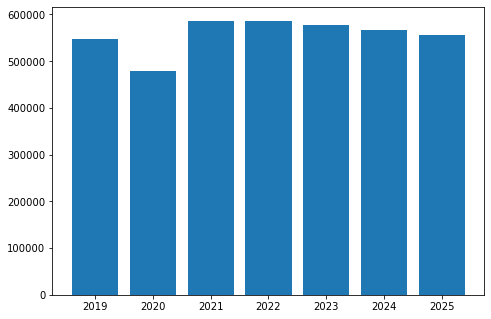

In [555]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Years = ['2019','2020','2021', '2022', '2023', '2024', '2025']
total = [546779.9, 478309.5,586842.74586104, 585551.63080842, 577727.47358956, 566669.33138689,
       556219.38700537]
ax.bar(Years,total)
plt.show()

GRAPH SHOWING RESEARCH PREDICTION OVER THE NEXT 5 YEARS AGAINST PREVIOUS 2 YEARS